## LSTM

Here’s a step-by-step guide on how to implement an LSTM (Long Short-Term Memory) model using TensorFlow to predict a time series dataset. I'll use a public dataset for demonstration, like the famous Airline Passenger Dataset, which shows the monthly number of airline passengers over a 12-year period.
Steps Involved:

    Loading the Dataset
    Preprocessing the Data
    Building the LSTM Model
    Training the Model
    Evaluating the Model
    Making Predictions

## 1. Loading the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url)

# Check the first few rows
print(data.head())


     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121


## 2. Preprocessing the Data
We need to preprocess the data by normalizing it and converting it into a suitable format for the LSTM model. LSTMs require data in the shape [samples, time steps, features].

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Extract the passengers column as the feature we want to predict
dataset = data['Passengers'].values
dataset = dataset.astype('float32')

# Normalize the dataset (LSTMs work better with scaled data)
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.reshape(-1, 1))

# Function to convert an array of values into a dataset matrix
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

# Create a dataset with a look-back of 1 (using the previous month to predict the next)
look_back = 1
X, Y = create_dataset(dataset, look_back)

# Reshape input to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)


## 3. Building the LSTM Model

Now, let’s create an LSTM model using TensorFlow’s Keras API. We’ll create a simple model with a single LSTM layer followed by a Dense layer.

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# Build the LSTM model
model = Sequential()

# Add Input layer
model.add(Input(shape=(look_back, 1)))

# Add LSTM layer
model.add(LSTM(50, return_sequences=False))  # LSTM layer with 50 units

# Add Dense output layer
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Summary of the model
model.summary()


2024-10-16 17:11:33.268523: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-16 17:11:33.269584: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-16 17:11:33.272542: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-16 17:11:33.281116: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-16 17:11:33.295417: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

2024-10-16 17:11:34.262690: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2024-10-16 17:11:34.908812: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

## 4. Training the Model

We will now train the model using the training dataset.



Epoch 1/100


113/113 - 2s - 14ms/step - loss: 0.0410


Epoch 2/100


113/113 - 0s - 992us/step - loss: 0.0171


Epoch 3/100


113/113 - 0s - 976us/step - loss: 0.0127


Epoch 4/100


113/113 - 0s - 1ms/step - loss: 0.0092


Epoch 5/100


113/113 - 0s - 987us/step - loss: 0.0062


Epoch 6/100


113/113 - 0s - 1ms/step - loss: 0.0045


Epoch 7/100


113/113 - 0s - 971us/step - loss: 0.0033


Epoch 8/100


113/113 - 0s - 1ms/step - loss: 0.0032


Epoch 9/100


113/113 - 0s - 1ms/step - loss: 0.0029


Epoch 10/100


113/113 - 0s - 962us/step - loss: 0.0029


Epoch 11/100


113/113 - 0s - 967us/step - loss: 0.0028


Epoch 12/100


113/113 - 0s - 996us/step - loss: 0.0028


Epoch 13/100


113/113 - 0s - 983us/step - loss: 0.0028


Epoch 14/100


113/113 - 0s - 1ms/step - loss: 0.0030


Epoch 15/100


113/113 - 0s - 1ms/step - loss: 0.0029


Epoch 16/100


113/113 - 0s - 1ms/step - loss: 0.0029


Epoch 17/100


113/113 - 0s - 1ms/step - loss: 0.0027


Epoch 18/100


113/113 - 0s - 1ms/step - loss: 0.0029


Epoch 19/100


113/113 - 0s - 2ms/step - loss: 0.0029


Epoch 20/100


113/113 - 0s - 2ms/step - loss: 0.0029


Epoch 21/100


113/113 - 0s - 1ms/step - loss: 0.0027


Epoch 22/100


113/113 - 0s - 1ms/step - loss: 0.0028


Epoch 23/100


113/113 - 0s - 987us/step - loss: 0.0029


Epoch 24/100


113/113 - 0s - 987us/step - loss: 0.0028


Epoch 25/100


113/113 - 0s - 964us/step - loss: 0.0030


Epoch 26/100


113/113 - 0s - 1ms/step - loss: 0.0029


Epoch 27/100


113/113 - 0s - 991us/step - loss: 0.0030


Epoch 28/100


113/113 - 0s - 995us/step - loss: 0.0028


Epoch 29/100


113/113 - 0s - 956us/step - loss: 0.0028


Epoch 30/100


113/113 - 0s - 998us/step - loss: 0.0028


Epoch 31/100


113/113 - 0s - 1ms/step - loss: 0.0028


Epoch 32/100


113/113 - 0s - 986us/step - loss: 0.0029


Epoch 33/100


113/113 - 0s - 987us/step - loss: 0.0028


Epoch 34/100


113/113 - 0s - 960us/step - loss: 0.0028


Epoch 35/100


113/113 - 0s - 969us/step - loss: 0.0028


Epoch 36/100


113/113 - 0s - 980us/step - loss: 0.0028


Epoch 37/100


113/113 - 0s - 968us/step - loss: 0.0029


Epoch 38/100


113/113 - 0s - 997us/step - loss: 0.0028


Epoch 39/100


113/113 - 0s - 1ms/step - loss: 0.0028


Epoch 40/100


113/113 - 0s - 1ms/step - loss: 0.0029


Epoch 41/100


113/113 - 0s - 1ms/step - loss: 0.0029


Epoch 42/100


113/113 - 0s - 1ms/step - loss: 0.0028


Epoch 43/100


113/113 - 0s - 2ms/step - loss: 0.0028


Epoch 44/100


113/113 - 0s - 2ms/step - loss: 0.0028


Epoch 45/100


113/113 - 0s - 2ms/step - loss: 0.0028


Epoch 46/100


113/113 - 0s - 1ms/step - loss: 0.0027


Epoch 47/100


113/113 - 0s - 1ms/step - loss: 0.0027


Epoch 48/100


113/113 - 0s - 1ms/step - loss: 0.0029


Epoch 49/100


113/113 - 0s - 967us/step - loss: 0.0028


Epoch 50/100


113/113 - 0s - 997us/step - loss: 0.0029


Epoch 51/100


113/113 - 0s - 967us/step - loss: 0.0028


Epoch 52/100


113/113 - 0s - 975us/step - loss: 0.0029


Epoch 53/100


113/113 - 0s - 980us/step - loss: 0.0028


Epoch 54/100


113/113 - 0s - 1ms/step - loss: 0.0029


Epoch 55/100


113/113 - 0s - 974us/step - loss: 0.0028


Epoch 56/100


113/113 - 0s - 979us/step - loss: 0.0030


Epoch 57/100


113/113 - 0s - 990us/step - loss: 0.0029


Epoch 58/100


113/113 - 0s - 972us/step - loss: 0.0029


Epoch 59/100


113/113 - 0s - 1ms/step - loss: 0.0028


Epoch 60/100


113/113 - 0s - 974us/step - loss: 0.0029


Epoch 61/100


113/113 - 0s - 962us/step - loss: 0.0028


Epoch 62/100


113/113 - 0s - 971us/step - loss: 0.0027


Epoch 63/100


113/113 - 0s - 989us/step - loss: 0.0028


Epoch 64/100


113/113 - 0s - 1ms/step - loss: 0.0028


Epoch 65/100


113/113 - 0s - 1ms/step - loss: 0.0028


Epoch 66/100


113/113 - 0s - 1ms/step - loss: 0.0028


Epoch 67/100


113/113 - 0s - 1ms/step - loss: 0.0029


Epoch 68/100


113/113 - 0s - 1ms/step - loss: 0.0029


Epoch 69/100


113/113 - 0s - 2ms/step - loss: 0.0027


Epoch 70/100


113/113 - 0s - 2ms/step - loss: 0.0027


Epoch 71/100


113/113 - 0s - 1ms/step - loss: 0.0028


Epoch 72/100


113/113 - 0s - 1ms/step - loss: 0.0028


Epoch 73/100


113/113 - 0s - 975us/step - loss: 0.0026


Epoch 74/100


113/113 - 0s - 987us/step - loss: 0.0028


Epoch 75/100


113/113 - 0s - 1ms/step - loss: 0.0028


Epoch 76/100


113/113 - 0s - 1ms/step - loss: 0.0030


Epoch 77/100


113/113 - 0s - 1ms/step - loss: 0.0028


Epoch 78/100


113/113 - 0s - 965us/step - loss: 0.0028


Epoch 79/100


113/113 - 0s - 993us/step - loss: 0.0028


Epoch 80/100


113/113 - 0s - 1ms/step - loss: 0.0027


Epoch 81/100


113/113 - 0s - 974us/step - loss: 0.0031


Epoch 82/100


113/113 - 0s - 1ms/step - loss: 0.0027


Epoch 83/100


113/113 - 0s - 975us/step - loss: 0.0027


Epoch 84/100


113/113 - 0s - 1ms/step - loss: 0.0028


Epoch 85/100


113/113 - 0s - 1ms/step - loss: 0.0027


Epoch 86/100


113/113 - 0s - 970us/step - loss: 0.0028


Epoch 87/100


113/113 - 0s - 1ms/step - loss: 0.0026


Epoch 88/100


113/113 - 0s - 1ms/step - loss: 0.0028


Epoch 89/100


113/113 - 0s - 1ms/step - loss: 0.0027


Epoch 90/100


113/113 - 0s - 1ms/step - loss: 0.0027


Epoch 91/100


113/113 - 0s - 1ms/step - loss: 0.0027


Epoch 92/100


113/113 - 0s - 1ms/step - loss: 0.0029


Epoch 93/100


113/113 - 0s - 2ms/step - loss: 0.0027


Epoch 94/100


113/113 - 0s - 2ms/step - loss: 0.0027


Epoch 95/100


113/113 - 0s - 1ms/step - loss: 0.0028


Epoch 96/100


113/113 - 0s - 1ms/step - loss: 0.0027


Epoch 97/100


113/113 - 0s - 972us/step - loss: 0.0028


Epoch 98/100


113/113 - 0s - 995us/step - loss: 0.0029


Epoch 99/100


113/113 - 0s - 1000us/step - loss: 0.0027


Epoch 100/100


113/113 - 0s - 980us/step - loss: 0.0027


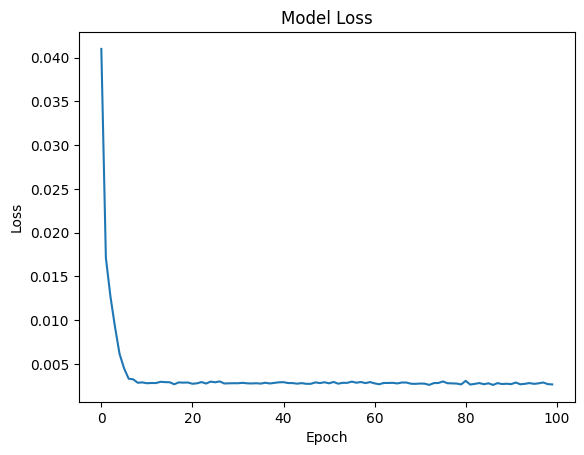

In [4]:
# Train the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2)

# Plot training loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


Explanation:

fit(): This method trains the model for 100 epochs using a batch size of 1. The model’s performance is printed for each epoch (verbose=2). The loss is plotted over the training period to see how the model improves over time.

### 5. Evaluating the Model

After training, we evaluate the model on the test data to see how well it generalizes.



In [5]:
# Make predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

# Inverse the predictions to get the original scale
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)

# Inverse the true values to get the original scale
Y_train_original = scaler.inverse_transform([Y_train])
Y_test_original = scaler.inverse_transform([Y_test])

# Calculate the RMSE (Root Mean Squared Error)
trainScore = np.sqrt(np.mean((trainPredict[:,0] - Y_train_original[0])**2))
testScore = np.sqrt(np.mean((testPredict[:,0] - Y_test_original[0])**2))

print(f'Train Score: {trainScore:.2f} RMSE')
print(f'Test Score: {testScore:.2f} RMSE')


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Train Score: 26.39 RMSE
Test Score: 51.61 RMSE


Explanation:
predict(): This method is used to make predictions on both the training and test datasets.
scaler.inverse_transform(): The predictions are scaled back to the original range.
RMSE: We use Root Mean Squared Error (RMSE) to evaluate the model. RMSE measures the difference between predicted values and actual values.

6. Making Predictions and Visualizing the Results

Finally, we plot the predicted values against the actual data to visualize how well the model performs.

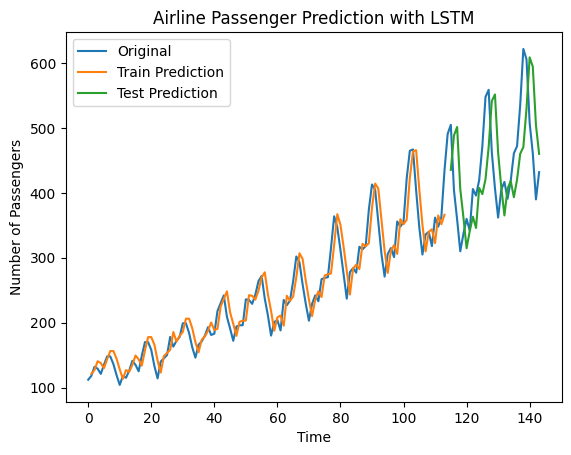

In [6]:
# Shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan

# Correct the index calculation for test predictions
test_start_idx = len(trainPredict) + (look_back * 2)
testPredictPlot[test_start_idx:test_start_idx + len(testPredict), :] = testPredict

# Plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.title('Airline Passenger Prediction with LSTM')
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.legend(['Original', 'Train Prediction', 'Test Prediction'])
plt.show()
